In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

join_df = pd.merge(city_df, ride_df,how='inner', on="city")

# Display the data table for preview
join_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

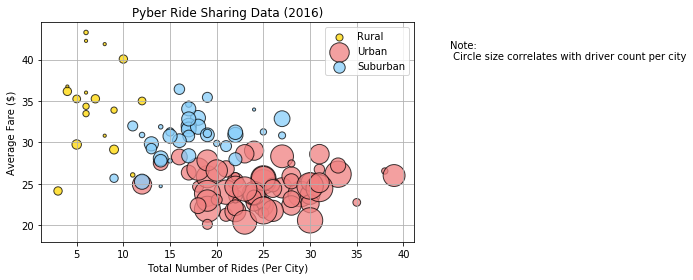

In [10]:
# Obtain the x and y coordinates for each of the three city types

#Splitting data per city type
onlyRural = join_df.loc[join_df["type"] == "Rural",: ]
onlySuburb = join_df.loc[join_df["type"] == "Suburban", : ]
onlyUrban = join_df.loc[join_df["type"] == "Urban", : ]

#getting aggs and other data
ruralGrp = onlyRural.groupby(["city"]).agg({"driver_count" : "first", "type":"first",
                                              "fare":"mean", "ride_id":"count"})

suburbGrp = onlySuburb.groupby(["city"]).agg({"driver_count" : "first", "type":"first",
                                              "fare":"mean", "ride_id":"count"})

urbanGrp = onlyUrban.groupby(["city"]).agg({"driver_count" : "first", "type":"first",
                                              "fare":"mean", "ride_id":"count"})

# getting x and y axes

x_rural = ruralGrp["ride_id"].tolist()
y_rural = ruralGrp["fare"].tolist()

x_suburb = suburbGrp["ride_id"].tolist()
y_suburb = suburbGrp["fare"].tolist()

x_urban = urbanGrp["ride_id"].tolist()
y_urban = urbanGrp["fare"].tolist()


# Build the scatter plots for each city types
plt.scatter(x_rural, y_rural, marker="o", facecolors="gold", edgecolors="black",
            alpha=0.75,label="Rural", s=ruralGrp["driver_count"]*10 )
plt.scatter(x_urban, y_urban, marker="o", facecolors="lightcoral", edgecolors="black",
           alpha=0.75, label="Urban", s=urbanGrp['driver_count']*10)
plt.scatter(x_suburb, y_suburb, marker="o", facecolors="lightskyblue", edgecolors="black",
           alpha=0.75, label="Suburban", s=suburbGrp['driver_count']*10)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.tight_layout()

# Create a legend
plt.legend(loc='upper right')

# Incorporate a text label regarding circle size
plt.text(45, 40, "Note: \n Circle size correlates with driver count per city")


# Save Figure
plt.savefig("./Images/PyberData.png",bbox_inches = "tight")



In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

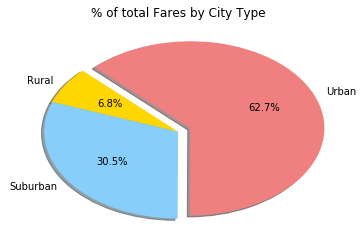

In [11]:
# Calculate Type Percents
totalFare = ride_df["fare"].sum()

fare = [round((onlySuburb["fare"].sum()/totalFare)*100,1), round((onlyUrban["fare"].sum()/totalFare)*100,1),
        round((onlyRural["fare"].sum()/totalFare)*100,1)]
colors = ["lightskyblue", "lightcoral", "gold"]
labels = ["Suburban", "Urban", "Rural"]

explode = (0, 0.1, 0, )

# Build Pie Chart
plt.pie(fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of total Fares by City Type")

# Save Figure
plt.savefig("./Images/PercFareCityType.png")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

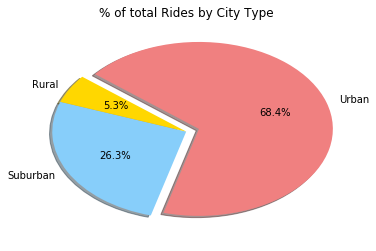

In [12]:
# Calculate Ride Percents
totalRides = ride_df["ride_id"].count()

rides = [round((onlySuburb["ride_id"].count()/totalRides)*100,1), round((onlyUrban["ride_id"].count()/totalRides)*100,1),
        round((onlyRural["ride_id"].count()/totalRides)*100,1)]

# Build Pie Chart
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of total Rides by City Type")

# Save Figure
plt.savefig("./Images/PercRidesCityType.png")

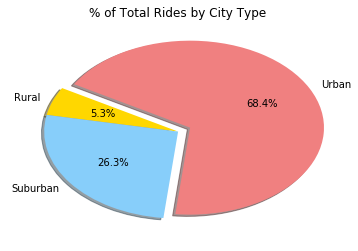

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

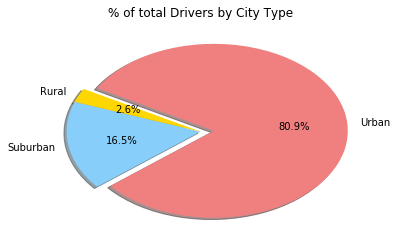

<Figure size 432x288 with 0 Axes>

In [13]:
# Calculate Driver Percents
totalDrivers = city_df["driver_count"].sum()

drivers = [round((suburbGrp["driver_count"].sum()/totalDrivers)*100,1), round((urbanGrp["driver_count"].sum()/totalDrivers)*100,1),
        round((ruralGrp["driver_count"].sum()/totalDrivers)*100,1)]

# Build Pie Chart
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of total Drivers by City Type")
plt.show()


# Save Figure
plt.savefig("./Images/PercDriversCityType.png")

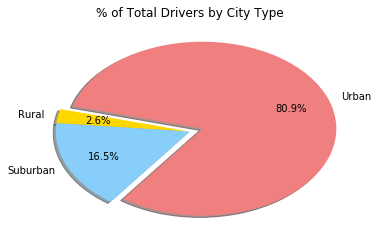

In [6]:
# Show Figure
plt.show()

In [ ]:
#junk Catcher cell
#please don't execute. It is expected to fail

#suburbDrivers = onlySuburb.groupby("type").agg({"driver_count":"first"})

totalDrivers = city_df["driver_count"].sum()
totalDrivers
urbanGrp["driver_count"].sum()
suburbGrp.head()
#print(totalRides)
#ruralRides = round((onlyRural["ride_id"].count()/totalRides)*100,1)
#urbanRides = round((onlyUrban["ride_id"].count()/totalRides)*100,1)
#surbanRides = round((onlySuburb["ride_id"].count()/totalRides)*100,1)
#rides
#ruralRides
#onlyRural["ride_id"].count()

#onlyRural_df = join_df.loc[join_df["type"] == "Rural",:]
#onlyRural_df.head()
#only_billys = df.loc[df["first_name"] == "Billy", :]

#ruralGrp = onlyRural_df.groupby(["city"]).agg({"driver_count" : "first", "type":"first",
#                                              "fare":"mean", "ride_id":"count"})
#ruralGrp.head()

#y_temp = ruralGrp["fare"].tolist()

#y_rural = y_temp.tolist()

#Series.tolist()
#y_temp

#cityType_df = join_df.groupby(["type"])
#cityType_df["type"].value_counts()

#.agg({"driver_count":"first"})
#cityType_df.head()
#cityType_df["ride_id"].count()

#cityRideCount = ridesPerCity_df['city'].value_counts()
#cityRideCount.head()
#x_axis
#df['Employer'].value_counts()


#plt.show()
# s=x_axis,

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
driverCt = urbanGrp['driver_count'].tolist()
plt.scatter(x_urban, y_urban, marker="o", facecolors="red", edgecolors="black",
           alpha=0.5, s=driverCt)
plt.show()
driverCt